In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [2]:
df=pd.read_csv('Data01.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df=df.drop('CustomerID',axis=1)

In [5]:
df['Gender']=pd.get_dummies(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


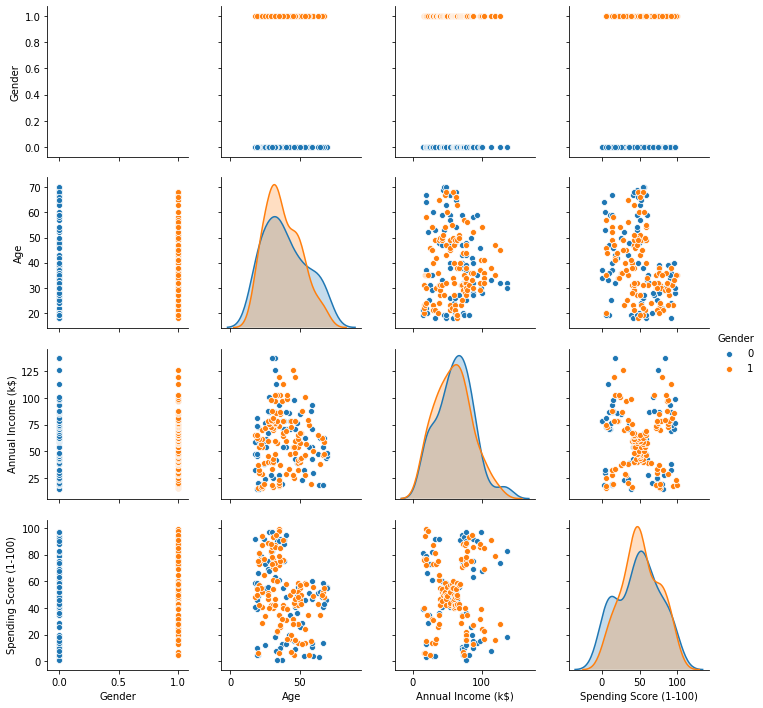

In [6]:
sns.pairplot(df,diag_kind='kde',hue='Gender')

In [7]:
df_scaled=df.apply(zscore)


In [8]:
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [9]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_scaled)
 # labels = clusters.labels_
 # centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,800.000000
1,2,588.802677
2,3,476.860069
3,4,388.604222
4,5,325.366604
5,6,276.991373
6,7,236.139962
7,8,199.716626
8,9,174.193096
9,10,152.086763


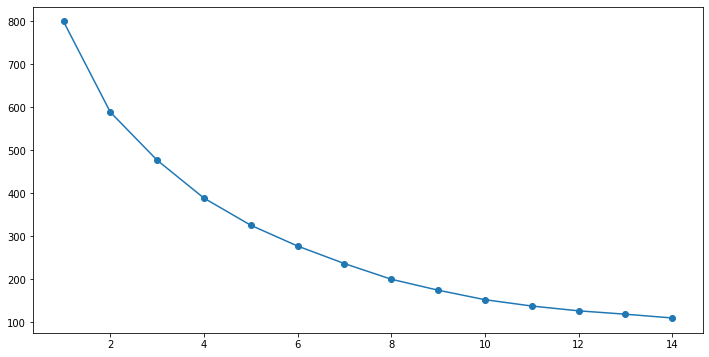

In [10]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [11]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2345)

In [12]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [13]:
centroids = kmeans.cluster_centers_

In [14]:
centroids

array([[-0.05241761,  0.70892251, -0.00247545, -0.69939115],
       [ 0.05565994, -0.75277339,  0.00262858,  0.74265245]])

In [15]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [16]:
centroid_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-0.052418,0.708923,-0.002475,-0.699391
1,0.055660,-0.752773,0.002629,0.742652


In [17]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [18]:
new_df = df.join(df_labels)

In [19]:
df_labels['labels'].value_counts()

0    103
1     97
Name: labels, dtype: int64

In [20]:
df['Gender'].value_counts()

1    112
0     88
Name: Gender, dtype: int64

In [21]:
new_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,0,19,15,39,1
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,1
4,1,31,17,40,1


In [22]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

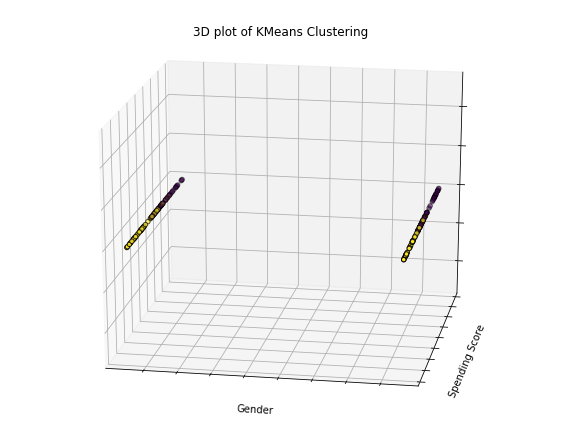

In [23]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(df_scaled)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Gender')
ax.set_ylabel('Spending Score')

ax.set_title('3D plot of KMeans Clustering')

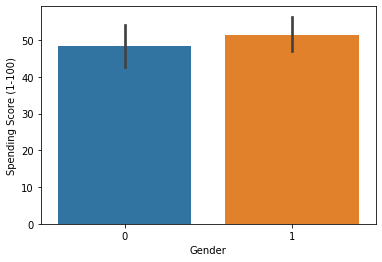

In [24]:
sns.barplot(x=new_df['Gender'],y=new_df['Spending Score (1-100)'])

In [26]:
# Females(0) have a slightly high spending score than males(0)

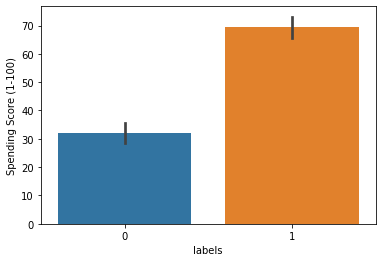

In [27]:
sns.barplot(x=new_df['labels'],y=new_df['Spending Score (1-100)'])

# Take 2 features spending score and annual income

In [28]:
df_ss=df_scaled[['Annual Income (k$)','Spending Score (1-100)']]

In [29]:
df_ss.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [30]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_ss)
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,400.000000
1,2,270.704267
2,3,157.704008
3,4,108.921317
4,5,65.568408
5,6,55.057348
6,7,44.911186
7,8,37.667323
8,9,32.360230
9,10,29.316377


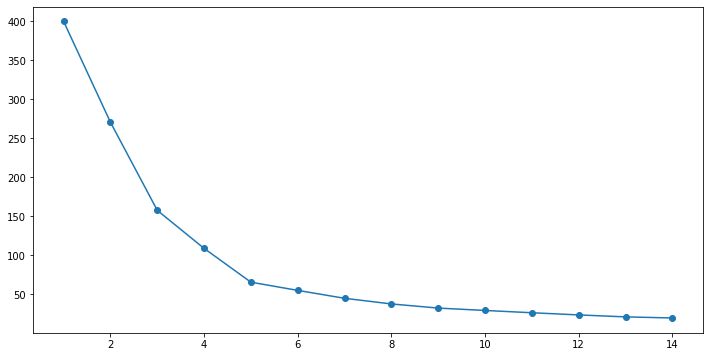

In [31]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [32]:
#Here I am taking 5 clusters

In [33]:
kmeans = KMeans(n_clusters=5, n_init = 15, random_state=2345)

In [34]:
kmeans.fit(df_ss)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [35]:
centroids = kmeans.cluster_centers_

In [36]:
centroids

array([[ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617]])

High income, Low spending
medium income, medium spending
high income, high spending
low income, high spending
low income, low spending

In [37]:
centroid_df = pd.DataFrame(centroids, columns = list(df_ss) )

In [38]:
centroid_df

,Annual Income (k$),Spending Score (1-100)
0,1.055003,-1.284439
1,-1.307519,-1.136965
2,0.991583,1.239503
3,-1.329545,1.132178
4,-0.200913,-0.026456


In [39]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [40]:
df_labels['labels'].value_counts()

4    81
2    39
0    35
1    23
3    22
Name: labels, dtype: int64

In [41]:
snail_df_labeled = df_ss.join(df_labels)
snail_df_labeled

,Annual Income (k$),Spending Score (1-100),labels
0,-1.738999,-0.434801,1
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,1
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,1
...,...,...,...
195,2.268791,1.118061,2
196,2.497807,-0.861839,0
197,2.497807,0.923953,2
198,2.917671,-1.250054,0


C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


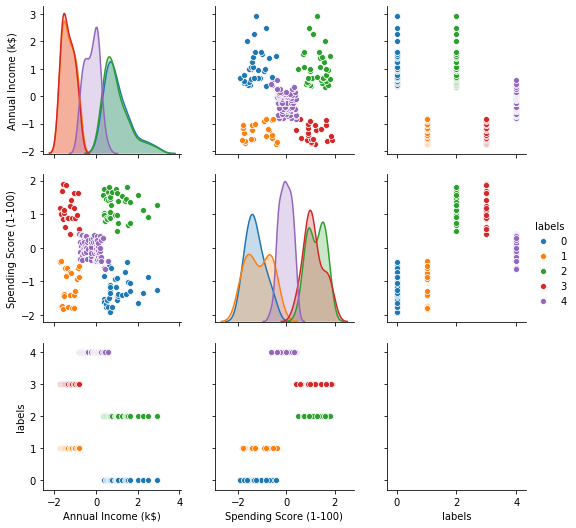

In [42]:
sns.pairplot(snail_df_labeled,diag_kind='kde',hue='labels')

We can see 5 clusters in annual income and spending score. cluster is more dense for medium spending and medium score. We can offer discounts to this category to bring them to high spending category. 
for high income, low spending category we can make a separate section that has branded/premium things for them.



# use features age and spending score

In [44]:
df_as=df_scaled[['Age','Spending Score (1-100)']]
df_as.head()

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980


In [45]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_as)
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,400.000000
1,2,189.387490
2,3,124.335538
3,4,89.765217
4,5,71.093641
5,6,53.128438
6,7,45.907105
7,8,39.991207
8,9,33.750483
9,10,28.818269


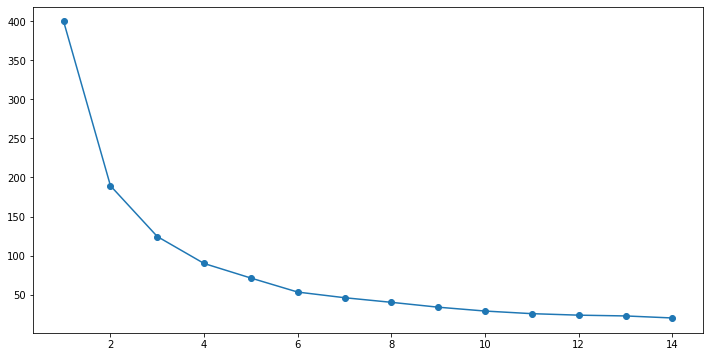

In [46]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [47]:
#Here I am considering 4 clusters

In [48]:
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=2345)

In [49]:
kmeans.fit(df_as)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [50]:
centroids = kmeans.cluster_centers_

In [51]:
centroids

array([[ 0.62833625, -1.36651894],
       [-0.61415725,  1.14971545],
       [ 1.22927178, -0.06558366],
       [-0.8346466 , -0.39442706]])

In [52]:
centroid_df = pd.DataFrame(centroids, columns = list(df_as) )

In [53]:
centroid_df

,Age,Spending Score (1-100)
0,0.628336,-1.366519
1,-0.614157,1.149715
2,1.229272,-0.065584
3,-0.834647,-0.394427


In [54]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [55]:
df_labels['labels'].value_counts()

1    65
3    50
2    47
0    38
Name: labels, dtype: int64

In [56]:
snail_df_labeled = df_ss.join(df_labels)
snail_df_labeled

,Annual Income (k$),Spending Score (1-100),labels
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,1
2,-1.700830,-1.715913,3
3,-1.700830,1.040418,1
4,-1.662660,-0.395980,3
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,0
197,2.497807,0.923953,1
198,2.917671,-1.250054,3


C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


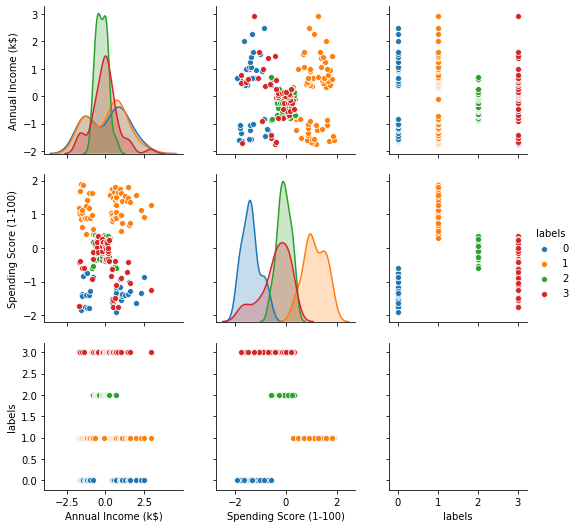

In [57]:
sns.pairplot(snail_df_labeled,diag_kind='kde',hue='labels')